
# Step 1: Sample
The first step of the SEMMA process is to select a representative sample from the dataset.
We will load the 'bear-attack.csv' dataset and select relevant features for analysis.


In [1]:

# Load the bear-attack dataset
import pandas as pd

file_path = 'bear-attack.csv'
bear_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
bear_data.head()


,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847



# Step 2: Explore
In this phase, we perform Exploratory Data Analysis (EDA) to detect patterns, relationships, or anomalies.
We will explore the distribution of key features and look for any interesting trends or patterns in the data.


In [2]:

# Summary statistics and basic exploration
bear_data.describe()

# Check for missing values
bear_data.isnull().sum()


,0
Name,0
age,2
gender,1
Date,0
Month,0
Year,0
Type,0
Location,0
Description,0
Type of bear,0



# Step 3: Modify
In the Modify phase, we clean and transform the data to prepare it for modeling.
This step may include handling missing values, encoding categorical variables, and feature scaling.


In [3]:

# Handle missing values (if any) by either filling or dropping them
bear_data_cleaned = bear_data.dropna()

# Example: Encode categorical variables if present
# Here, assuming there's a categorical variable, we would encode it using one-hot encoding
# bear_data_cleaned = pd.get_dummies(bear_data_cleaned, columns=['categorical_column'])

# Display the cleaned data
bear_data_cleaned.head()


,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
5,Frank Welch,61.0,male,08/09/1916,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Welch was killed at a camp near Sylvan Pass wh...,Brown bear,0,0,0,1,44.620089,-110.560689



# Step 4: Model
In this step, we apply data mining techniques to the prepared data.
We will use a suitable machine learning algorithm, such as Random Forest, to model the dataset.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# **Replace 'ACTUAL_TARGET_COLUMN_NAME' with the actual name of your target variable column**
ACTUAL_TARGET_COLUMN_NAME = 'Type of bear'  # Example: Replace with 'species' if that's your target column

# Ensure the target column name exists in the DataFrame
if ACTUAL_TARGET_COLUMN_NAME in bear_data_cleaned.columns:
    # Assuming we are predicting a target variable, we split the dataset into features and target
    # Drop the 'Name' column along with the target column
    X = bear_data_cleaned.drop(columns=[ACTUAL_TARGET_COLUMN_NAME, 'Name'])  # Exclude 'Name' column
    y = bear_data_cleaned[ACTUAL_TARGET_COLUMN_NAME]

    # Create a LabelEncoder object
    label_encoder = LabelEncoder() # Indented to align with other lines in the 'if' block

    # Iterate through columns of X and encode any object (string) type columns
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = label_encoder.fit_transform(X[col]) # Indented to align within the loop

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Apply Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)
    y_pred

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)  # Print the accuracy score
else:
    print(f"Error: Column '{ACTUAL_TARGET_COLUMN_NAME}' not found in DataFrame.")
    # Print the available columns for debugging
    print(f"Available columns: {bear_data_cleaned.columns.tolist()}")

0.9166666666666666


In [17]:
# prompt: print some predictions along with data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

file_path = 'bear-attack.csv'
bear_data = pd.read_csv(file_path)

ACTUAL_TARGET_COLUMN_NAME = 'Type of bear'

if ACTUAL_TARGET_COLUMN_NAME in bear_data.columns:
    X = bear_data.drop(columns=[ACTUAL_TARGET_COLUMN_NAME, 'Name'])
    y = bear_data[ACTUAL_TARGET_COLUMN_NAME]

    label_encoder = LabelEncoder()
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = label_encoder.fit_transform(X[col])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Create a DataFrame for predictions and actual values
    predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(predictions_df)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}")
else:
    print(f"Error: Column '{ACTUAL_TARGET_COLUMN_NAME}' not found in DataFrame.")
    print(f"Available columns: {bear_data.columns.tolist()}")

         Actual   Predicted
100  Black bear  Black bear
136  Black bear  Black bear
78   Black bear  Black bear
56   Polar Bear  Black bear
97   Brown bear  Brown bear
29   Black bear  Black bear
104  Black bear  Brown bear
82   Polar Bear  Black bear
162  Brown bear  Brown bear
108  Brown bear  Brown bear
19   Black bear  Black bear
42   Brown bear  Brown bear
15   Brown bear  Brown bear
67   Black bear  Black bear
24   Black bear  Black bear
31   Brown bear  Black bear
131  Brown bear  Black bear
51   Black bear  Brown bear
101  Brown bear  Brown bear
16   Black bear  Black bear
76   Polar Bear  Black bear
18   Black bear  Black bear
12   Brown bear  Black bear
9    Brown bear  Brown bear
132  Black bear  Black bear
75   Black bear  Black bear
135  Brown bear  Brown bear
60   Black bear  Black bear
55   Brown bear  Brown bear
146  Brown bear  Brown bear
30   Brown bear  Brown bear
140  Brown bear  Brown bear
119  Black bear  Black bear
85   Polar Bear  Brown bear
157  Brown bear  Bro


# Step 5: Assess
In the final step, we assess the performance of the model.
We will evaluate the model using metrics such as accuracy, and analyze the importance of different features.


In [13]:

# Assess the model's performance by displaying the accuracy score
print(f"Accuracy of the model: {accuracy}")

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)


Accuracy of the model: 0.9166666666666666


,0
Longitude,0.218215
Latitude,0.129412
age,0.115641
Date,0.105843
Location,0.104744
Description,0.084338
Year,0.082808
Month,0.047773
Grizzly,0.043061
Type,0.029133


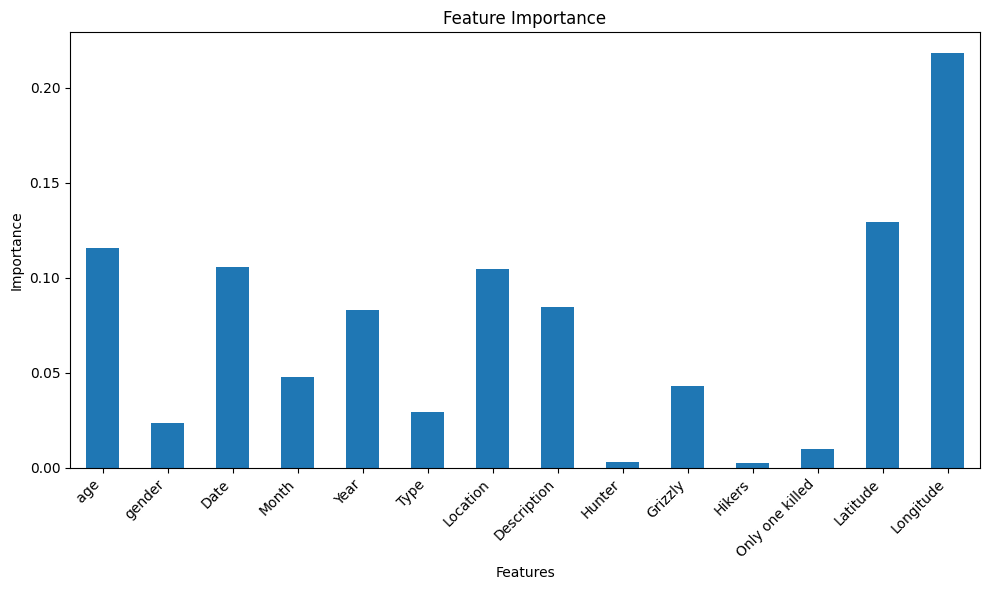

In [19]:
# prompt: plot some graphs wrt semma model here

import matplotlib.pyplot as plt
import seaborn as sns



# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()